# Assignment B | Final Project
**02806 Social Data Visualization**

**Group numher:** 36

**Group members:** 
- Birkir Fanndal Sturluson s232729 
- Brynjar Karl Ævarsson s232736 
- Védís Sigríður Ingvarsdóttir s232719 

___

# Table of Contents
* [Motivation](#motivation)

* [Basic stats](#basic)
    * [Data cleaning](#cleaning)

* [Data analysis](#data_analysis)
    * [Data info](#data_info)

* [Genre](#genre)

* [Visualizations](#visualizations)
    * [Stadiums](#stadiums)
    * [Teams](#teams)

* [Discussion](#discuss)
* [Contributions](#contribute)




___

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.palettes import Category20
from bokeh.io import reset_output
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import column
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from bokeh.transform import Dodge  
from bokeh.models import ColumnDataSource, FactorRange, CDSView, BooleanFilter
from sklearn.linear_model import LinearRegression


In [281]:
import warnings
warnings.filterwarnings('ignore')

<a id="motivation"></a> <br>
# Motivation

We have three main datasets. The first one is called "NFL Stadium Coordinates," and it includes information on the latitude and longitude of each NFL team stadium. We can use this dataset to get a geographical sense of the data. The second dataset is called "NFL Attendance 2000-2019," which includes information on the weekly attendance of each game for each team from 2000 to 2019, whether they are playing at home or away. The third and final dataset is called "NFL Games 1999-2023," which includes much more information for each game of the NFL season from 1999 to 2023. The most important features that we will use from this dataset are the game schedule (weeks), dates, home team, away team, and the score of the game, along with more information.

We chose these datasets because we believe that by merging them together, we can show the most comprehensive visuals that can help the "new" fan choose their favorite team based on statistics and trends.

Our goal for the end user's experience is to provide clear visualizations and analysis to help them understand the dynamics of the NFL, identify teams to support based on historical performance and fan engagement, and ultimately enhance their enjoyment of the sport.

In [282]:
# Coordinates for NFL stadiums
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [283]:
stadium_coordinates.head()

,Team,Conference,latitude,longitude,zip,pic,Unnamed: 6
0,Titans,AFC,36.166461,-86.771289,37213,y,g
1,Giants,NFC,40.812194,-74.076983,10021,y,NaN
2,Steelers,AFC,40.446786,-80.015761,15202,y,NaN
3,Panthers,NFC,35.225808,-80.852861,28202,y,g
4,Ravens,AFC,39.277969,-76.622767,21203,y,g


In [284]:
game_attendance.head()

,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.0
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.0
2,Arizona,Cardinals,2000,893926,387475,506451,3,NaN
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.0
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.0


In [285]:
games.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999.0,REG,1.0,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999.0,REG,1.0,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999.0,REG,1.0,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999.0,REG,1.0,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999.0,REG,1.0,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome


-----------------------------

<a id="basic"></a> <br>
# Basic stats

## Data Cleaning and Preprocessing

Before we started working on visualizations, we needed to undertake several data cleaning and preprocessing steps to ensure that there were no errors or inconsistencies in our dataset. Here is an overview of the steps we took:


##### 1. Mapping Team Abbreviations:
We defined a dictionary that maps team abbreviations to their corresponding team names and used it to standardize team abbreviations across datasets. We created a column for the team name for each of the datasets so that the mapping would work correctly.


In [286]:
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'OAK',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# extracting the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# match team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# new column for team abbrivations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)

# change the name for the 49ers to match the other datasets
stadium_coordinates["Team"] = stadium_coordinates["Team"].replace('Forty-Niners', '49ers')

#  reate a new column with abbreviations stadium coordinates
stadium_coordinates['team_abbr'] = stadium_coordinates['Team'].map(team_abbr)

##### 2. Filtering Data and Ensuring Consistency:
Next, we processed each dataset by creating datetime objects or changing columns to integers to ensure consistency among the datasets before merging. We observed that the "NFL Attendance" dataset only contained data for the years 2000 to 2019, whereas the "NFL Games" dataset covered the years 1999 to 2023. Thus, we filtered each dataset to include only the date range from 2000 to 2019.

In [287]:
games["gameday"] = pd.to_datetime(games['gameday'])
games['year'] = games['gameday'].dt.year

# filtering games data for the years 2000 to 2019
game_score_filtered = games[(games['year'] >= 2000) & (games['year'] <= 2019)]

# filtering game_attendance data for the years 2000 to 2019
team_data_filtered = game_attendance[(game_attendance['year'] >= 2000) & (game_attendance['year'] <= 2019)]

# converting the 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)

##### 3. Merging Datasets:
We merged the filtered datasets based on common columns such as team abbreviation, week, and year to create a comprehensive dataset that we could use for visualization.

In [288]:
# merging the filtered datasets on home team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# merging the stadium coordinates
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_abbr'], right_on=["team_abbr"], how='inner')


##### 4. Filter and Check Dataset:
We filtered out only the columns we were interested in for our visualizations. Subsequently, we checked for NaN values and unique values to ensure data integrity. We noticed that the weather columns contained some NaN values, which is acceptable as they will be handled during visualization. Additionally, we observed that there were 32 unique "Team Abbreviations," corresponding to the total number of teams in the NFL. However, we also found 84 unique stadiums, originating from the "NFL Games" dataset, which was incorrect as some stadiums had different names despite being at the same location. This issue will be addressed in a subsequent step.

In [289]:
result = final_data[["game_id","season","week","gameday","weekday","wind","temp","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude"]]


In [290]:
result.isna().sum()

game_id                 0
season                  0
week                    0
gameday                 0
weekday                 0
wind                 1133
temp                 1133
home_team               0
away_team               0
home_score              0
away_score              0
stadium                 0
team                    0
team_name               0
weekly_attendance       0
last_name               0
team_abbr               0
Team                    0
longitude               0
latitude                0
dtype: int64

In [291]:
result.nunique()

game_id              4855
season                 21
week                   17
gameday               853
weekday                 7
wind                   37
temp                   98
home_team              32
away_team              34
home_score             59
away_score             54
stadium                84
team                   30
team_name              32
weekly_attendance    3803
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
dtype: int64

##### 5. Creating New Columns: 
We introduced new columns to indicate the winning team, calculate the home team's win status, and extract the year component from the 'season' column.

In [292]:
# winning team column
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# home_team win column
result['home_team_win'] = result['home_team'] == result['winning_team']

# season to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')

# getting the year component
result['season'] = result['season'].dt.year

# filtering out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

##### 6. Data Transformation: 
We transformed team abbreviations to match those used consistently across datasets and handled cases where teams relocated (e.g., San Diego Chargers to Los Angeles Chargers, St. Louis Rams to Los Angeles Rams). These teams changed names and therefore needed to be handled to ensure consistency.

In [293]:
# SD and LAC are the same team
team_mapping = {
    'SD': 'LAC',
   
}
# STL and LA are the same team
team_mapping2 = {
    'STL': 'LA',
    
}

In [294]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)

result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)

result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

##### 7. Handling the Stadium Names Discrepency
We noticed that there were 31 unique longitude and latitude pairs for each stadium (The Jets and Giants play at the same stadium), aligning with the total of 32 NFL teams. However, the stadium names in the dataset were incorrect. To rectify this issue, we introduced a new column named "stadium_name" in the dataset. This column combines the team abbreviation with "Stadium." Consequently, we obtained 31 unique stadium names, each including the team abbreviation along with the corresponding longitude and latitude.

In [295]:
# creating the new column 'stadium_name' that combines the team abbreviation and 'stadium' for each stadium name
result['stadium_name'] = result['team_abbr'] + ' Stadium'

# renaming the stadium name for shared location of NYG/NYJ
result.loc[result['team_abbr'].isin(['NYG', 'NYJ']), 'stadium_name'] = 'NYG/NYJ Stadium'
result.loc[result['team_abbr'].isin(['LA', 'LAC']), 'stadium_name'] = 'LA/LAC Stadium'

# dropping original 'stadium' column
result.drop(columns=['stadium'], inplace=True)

## Data Info after Cleaning and Preprocessing

- The dataset contains information on NFL games, including game ID, season, week, game day, weather conditions (temperature and wind), home and away teams, scores, stadium coordinates, and weekly attendance.
- We filtered the dataset to focus on the years 2000 to 2019 to align with the attendance dataset's timeframe.
- Key features for analysis include game outcomes (winning team), average attendance per stadium, game day weather conditions, and home team win rates.

-----------------------------

<a id="data_analysis"></a> <br>
# Data analysis

In [296]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 1 to 4854
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   game_id            4840 non-null   object        
 1   season             4840 non-null   int64         
 2   week               4840 non-null   int64         
 3   gameday            4840 non-null   datetime64[ns]
 4   weekday            4840 non-null   object        
 5   wind               3709 non-null   float64       
 6   temp               3709 non-null   float64       
 7   home_team          4840 non-null   object        
 8   away_team          4840 non-null   object        
 9   home_score         4840 non-null   float64       
 10  away_score         4840 non-null   float64       
 11  team               4840 non-null   object        
 12  team_name          4840 non-null   object        
 13  weekly_attendance  4840 non-null   float64       
 14  last_nam

In [297]:
result.describe()

,season,week,wind,temp,home_score,away_score,weekly_attendance,longitude,latitude
count,4840.000000,4840.000000,3709.000000,3709.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000
mean,2009.624793,9.099587,8.447290,58.512807,23.005579,20.651240,67821.162190,-89.090174,37.881283
std,5.787135,4.990837,5.463001,16.743421,10.341881,10.131857,9047.810127,14.339047,5.196871
min,2000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,23127.000000,-122.386256,25.957919
25%,2005.000000,5.000000,5.000000,47.000000,16.000000,13.000000,63454.500000,-94.484039,33.757614
50%,2010.000000,9.000000,8.000000,59.000000,23.000000,20.000000,68756.000000,-84.516039,39.095442
75%,2015.000000,13.000000,12.000000,71.000000,30.000000,27.000000,72881.000000,-80.015761,41.506022
max,2019.000000,17.000000,71.000000,109.000000,62.000000,59.000000,105121.000000,-71.264350,47.595153


----------------------

<a id="genre"></a> <br>
# Genre

Genre. Which genre of data story did you use?

* For this project, we decided to choose the magazine style as our presentation genre for the storytelling and data visualization. There are several factors that play into this decision. Firstly, we believe that the magazine style provides readers with efficiency when reading our project, as well as visually appealing images. The magazine style genre offers opportunities to present complex and diverse visualizations in a simpler way, which influences audience engagement and clarity. 

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Visual Narrative:
    * Visual Structuring: 
    * Highlighting:
    * Transition Guidance: 


Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Narratuve Structure:
    * Ordering: 
    * Interactivity:
    * Messaging: 
    

-------------------------

<a id="visualizations"></a> <br>
# Visualizations

<a id="stadiums"></a> <br>
### Stadiums

The first visualization we did for the stadiums was of course a folium map displaying the locations of the stadiums. That type of graph is always valuable for a new fan to see to get a sense of the home of each stadium - and might get them to do research of the NFL spirit in the according state.

In [298]:

map = folium.Map(location=[result['latitude'].mean(), result['longitude'].mean()],zoom_start=4.4)
plotted_stadiums = set()
result_filtered = result.dropna(subset=['latitude', 'longitude'])

for index, row in result_filtered.iterrows():
    stadium = row['stadium_name']
    lat = row['latitude']
    lon = row['longitude']
    
    if stadium not in plotted_stadiums:
      
        folium.Marker(location=[lat, lon], tooltip=stadium).add_to(map)
        
        plotted_stadiums.add(stadium)

map.save("map1.html")

map



## VEFSÍÐA

In the map above, the locations of the stadium for each team is displayed. As a new, european fan, locations of the stadiums for each team may not matter as much to you as you don't live in the USA, but knowing in what state the stadium is in might give you some ideas on how the gameday spirit would look like and how many people would show - if you decide to take a quick trip to see a game.

Here below we can see the total attendance per stadium. This can give a new fan good indication on where the most fun is - like from the graph we can see that the NYG/NYJ stadium has by far the most attendance which is a good indicator on how good the stadium is.

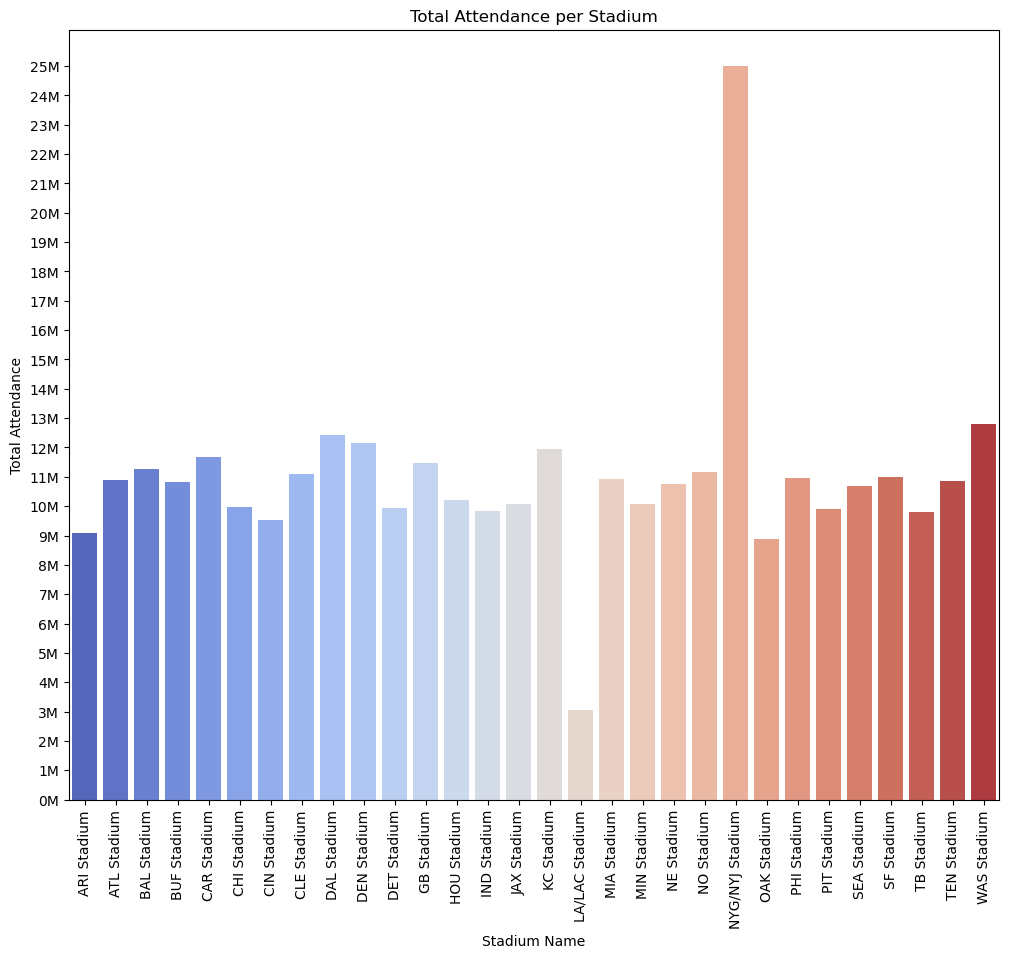

In [299]:
# Your code to create the bar plot
total_attendance_stadium = result.groupby('stadium_name')['weekly_attendance'].sum().reset_index(name='Total Attendance')

plt.figure(figsize=(12, 10))
sns.barplot(x='stadium_name', y='Total Attendance', data=total_attendance_stadium, palette='coolwarm')
plt.xlabel('Stadium Name')
plt.ylabel('Total Attendance')
plt.title('Total Attendance per Stadium')
plt.xticks(rotation=90)  

# Adjusting y-axis ticks for readability
max_attendance = total_attendance_stadium['Total Attendance'].max()
max_tick = ((max_attendance + 1000000) // 1000000) * 1000000
tick_values = range(0, int(max_tick) + 1000000, 1000000)
plt.yticks(tick_values, [f'{x/1000000:.0f}M' for x in tick_values])

# Save the plot as a PNG file
plt.savefig('total_attend_per_stadium.png', bbox_inches='tight')

# Show the plot
plt.show()


## VEFSÍÐA

Let's take a look at the total attendance for each stadium in the years 2000-2019 so you can get a feeling of how many attend each stadium. Let's note that the NYG/NYJ is used for two teams, which explains the high total attendance. This graph will give you an insight into which stadiums have drawn the largest crowds and how attendance can vary significantly from one venue to another.

Key points to consider:
* Dual-Use Stadium: The stadium shared by the New York Giants and New York Jets, referred to in our data as NYG/NYJ, consistently shows higher attendance figures. This is because it serves as the home field for two teams, essentially doubling its exposure to fans throughout the NFL season.
* Stadium Capacity: Attendance figures are influenced by the capacity of each stadium. Larger stadiums can accommodate more fans, and this is often reflected in higher total attendance numbers. For example, venues like the LAC stadium, the home of the Los Angeles Chargers and the Rams, located in Inglewood, has much less capacity than other stadiums, which results in a lower total attendance. 


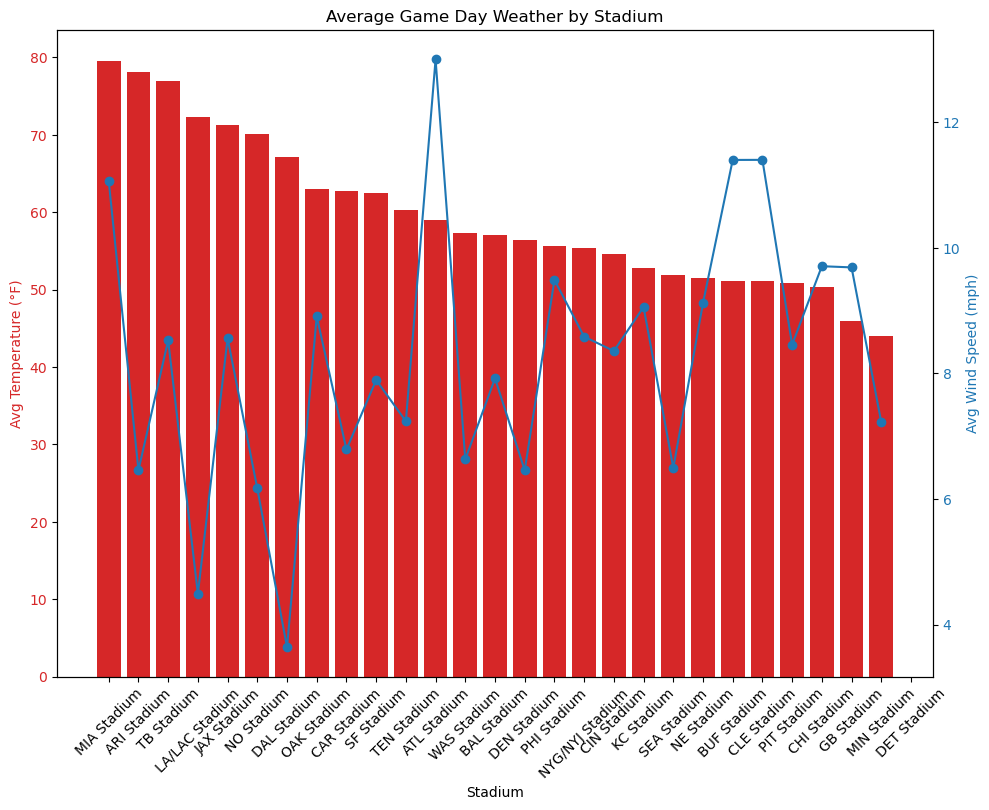

In [300]:
import seaborn as sns

stadium_weather = result.groupby('stadium_name').agg({
    'temp': 'mean',
    'wind': 'mean'
}).sort_values(by='temp', ascending=False)


fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Stadium')
ax1.set_ylabel('Avg Temperature (°F)', color=color)
ax1.bar(stadium_weather.index, stadium_weather['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(stadium_weather.index, rotation=45)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Avg Wind Speed (mph)', color=color)
ax2.plot(stadium_weather.index, stadium_weather['wind'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Average Game Day Weather by Stadium')
plt.show()

In [301]:
# Calculate home wins
home_wins = result[result['home_team_win'] == 1].groupby('home_team').size()

# Calculate total home games
total_home_games = result.groupby('home_team').size()

# Calculate home win rate
home_win_rate = (home_wins / total_home_games).sort_values(ascending=False)

# Convert Series to DataFrame and reset index to turn the index into a column
home_win_rate = home_win_rate.reset_index()

# Rename columns directly
home_win_rate.columns = ['home_team', 'win_rate']

# Display the DataFrame to verify the output
print(home_win_rate)

   home_team  win_rate
0         NE  0.812500
1        BAL  0.737500
2         GB  0.712500
3        PIT  0.706250
4        IND  0.681250
5        SEA  0.675000
6        MIN  0.662500
7        DEN  0.656250
8        PHI  0.606250
9         KC  0.593750
10        NO  0.581250
11       DAL  0.568750
12       ATL  0.562500
13        SF  0.556250
14       CHI  0.556250
15       TEN  0.543750
16       CAR  0.537500
17       HOU  0.534722
18       ARI  0.531250
19        LA  0.531250
20       MIA  0.531250
21       CIN  0.531250
22       NYJ  0.525000
23       NYG  0.506250
24       BUF  0.506250
25       LAC  0.500000
26       JAX  0.475000
27        TB  0.475000
28       OAK  0.456250
29       WAS  0.456250
30       DET  0.437500
31       CLE  0.375000


In [302]:
home_win_rate = home_win_rate.merge(result[['home_team', 'latitude', 'longitude']].drop_duplicates(), on='home_team', how='left')


In [303]:
import folium
from branca.colormap import LinearColormap


color_scale = LinearColormap(
    colors=['red', 'green'],
    vmin=home_win_rate['win_rate'].min(),
    vmax=home_win_rate['win_rate'].max(),
    caption='Home Win Rate for Teams and their home stadium'
)

# Create a map centered at a specific location
map = folium.Map(location=[home_win_rate['latitude'].mean(), home_win_rate['longitude'].mean()], zoom_start=3.9)

# Iterate through each team and its associated data
for index, row in home_win_rate.iterrows():
    team_name = row['home_team']
    win_rate = row['win_rate']
    lat = row['latitude']
    lon = row['longitude']

    if pd.notna(lat) and pd.notna(lon):  # Ensure there are no NaN values for coordinates
        color = color_scale(win_rate)  # Get the appropriate color

        # Add a circle marker to the map
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color='gray',
            fill=True,
            fill_color=color,
            fill_opacity=1.0,
            tooltip=f"{team_name}: {win_rate:.2f}% win rate"
        ).add_to(map)

# Add the color scale to the map
map.add_child(color_scale)

# Display the map
map

## VEFSÍÐA

In this interactive graph, we've displayed the home win rates for each NFL team in their own stadiums. This visualization can capture the spirit of the game and the  edge that teams may gain in their home stadium. As you explore and hover over this graph, you'll see how different teams leverage their home field advantage, which can vary from one team to another based on factors like crowd support, familiar playing conditions, and even weather. Whether you’re a seasoned fan or new to the NFL, this graph offers a valuable insight into the advantage of playing at home. 

The next graph  illustrates the distribution of the home win rate by stadiums to gain another angle. From both of the graphs, we see that the team that has the highest percentage of home wins at their home stadium are the New England Patriots which are located in Boston. While the New Englan Patriots are successfully maintaining their high home winning rate, the Cleveland Browns have the lowest home win rate percentage.

## VEFSÍÐA

As a fan, whether you're watching a game from your living room or you're cheering in the stands, knowing the weather conditions can motivate you when choosing what team you would want to travel for. Think of it like this, do you want to travel to go see your new team play a game on their home stadium? Then perhaps the average weather conditions influence you in where you would travel. The graph below shows us the average wind speed as well as the average temperature for each home team stadium. 



In [304]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
stadium_weather = result.groupby('stadium_name').agg({
    'temp': 'mean',
    'wind': 'mean'
}).sort_values(by='temp', ascending=False)
stadium_weather=stadium_weather.reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=stadium_weather['stadium_name'], y=stadium_weather['temp'], name='Avg Temperature (°F)'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=stadium_weather['stadium_name'], y=stadium_weather['wind'], name='Avg Wind Speed (mph)', mode='lines+markers'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text='Average Game Day Weather by Stadium'
)

# Set x-axis title
fig.update_xaxes(title_text='Stadium')

# Set y-axes titles
fig.update_yaxes(title_text='Avg Temperature (°F)', secondary_y=False, color='blue')
fig.update_yaxes(title_text='Avg Wind Speed (mph)', secondary_y=True, color='red')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show()

From the weather conditions graph, we can see that the average temperate is highest for the Miami Dolphins, which would be expected as the stadium is located in the sunny Miami state. Let's note that it is a very personal preference on what type of weather fans like to have while sitting in the stands. While the temperature is hot in Miami, the wind does pick up. It is especially windy for the Atlanta stadium, which might not be good weather conditions for sitting and watching a game. 

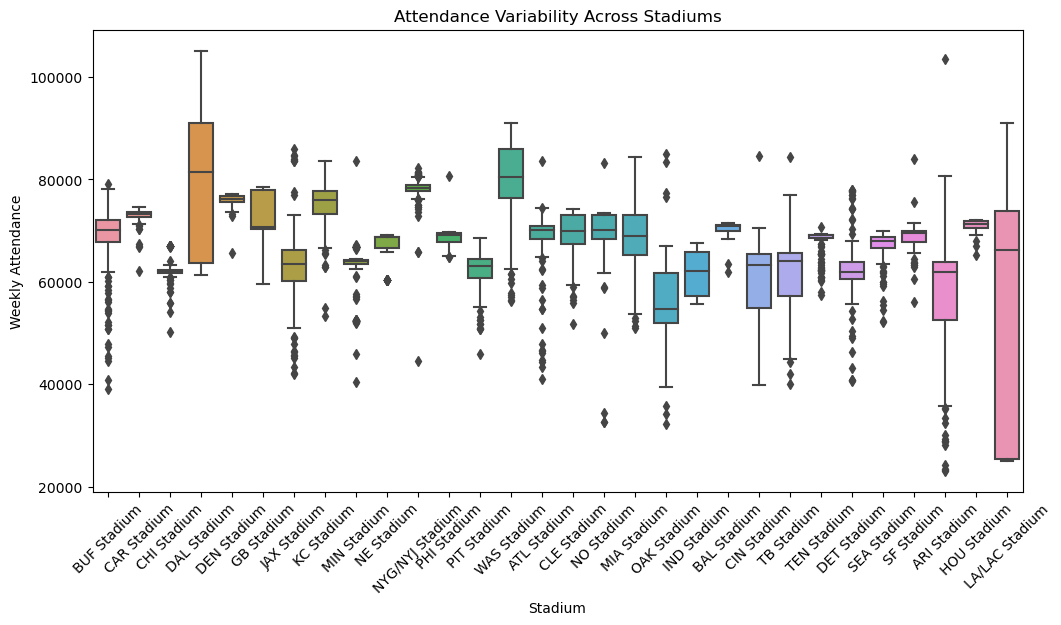

In [305]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=result, x='stadium_name', y='weekly_attendance')
plt.xticks(rotation=45)
plt.title('Attendance Variability Across Stadiums')
plt.xlabel('Stadium')
plt.ylabel('Weekly Attendance')
plt.show()

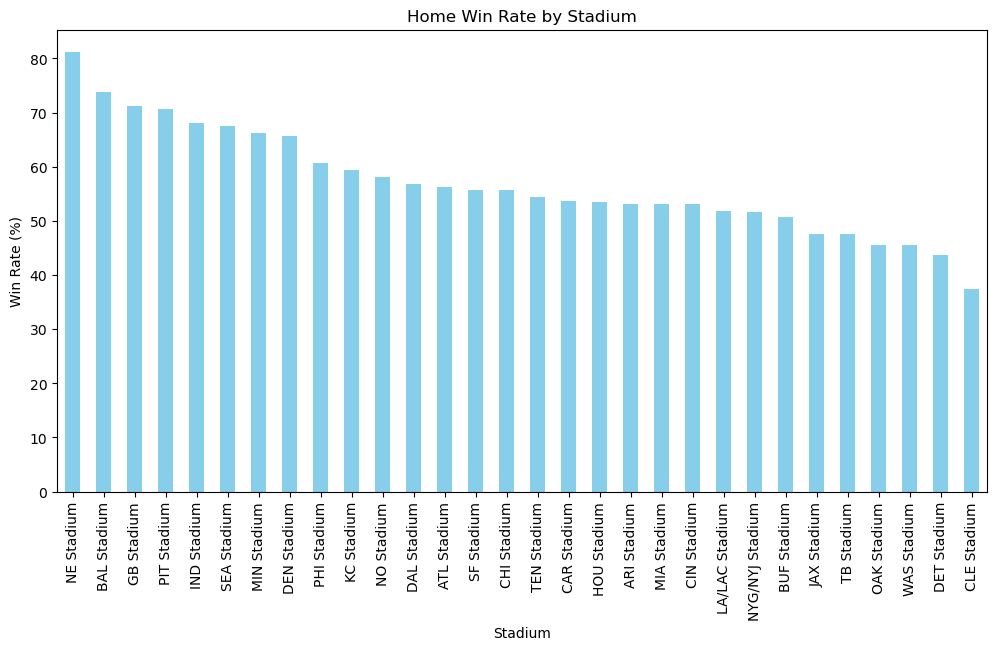

In [306]:
home_wins = result[result['home_team_win'] == 1].groupby('stadium_name').size().sort_values(ascending=False)
home_games = result.groupby('stadium_name').size().sort_values(ascending=False)
win_rates = home_wins / home_games * 100
win_rates = win_rates.sort_values(ascending=False)

win_rates.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Home Win Rate by Stadium')
plt.xlabel('Stadium')
plt.ylabel('Win Rate (%)')
plt.show()

In [307]:
reset_output()
output_notebook()

# Assuming 'result' DataFrame has 'weekly_attendance' and 'stadium_name'
stadiums = result['stadium_name'].unique()
palette = [Category20[20][i % 20] for i in range(len(stadiums))]

# Creating histogram data for each stadium
hist_data = {}
edges_data = {}
for i, stadium in enumerate(stadiums):
    hist, edges = np.histogram(result[result['stadium_name'] == stadium]['weekly_attendance'], bins=10)
    hist_data[stadium] = hist
    edges_data[stadium] = edges

# Creating a Bokeh figure
p = figure(title="Histogram of Weekly Attendance by Stadium", x_axis_label='Weekly Attendance', y_axis_label='Frequency',
           width=1300, height=1000, tools="pan,wheel_zoom,box_zoom,reset,save")

# Add quads for each histogram
for i, stadium in enumerate(stadiums):
    p.quad(top=hist_data[stadium], bottom=0, left=edges_data[stadium][:-1], right=edges_data[stadium][1:],
           fill_color=palette[i], line_color='white', alpha=0.8, legend_label=stadium,
           muted_color=palette[i], muted_alpha=0.1, muted=True)

# Configuring the interactive legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"
p.legend.click_policy = "mute"  # Allows users to click on legend items to hide/show histograms


show(p)

Loading BokehJS ...

<a id="teams"></a> <br>
### Teams

#### Wins

We decided to plot the average weekly attendance for each team to give the new fan some inkling on which team gets the most attendance to their games.

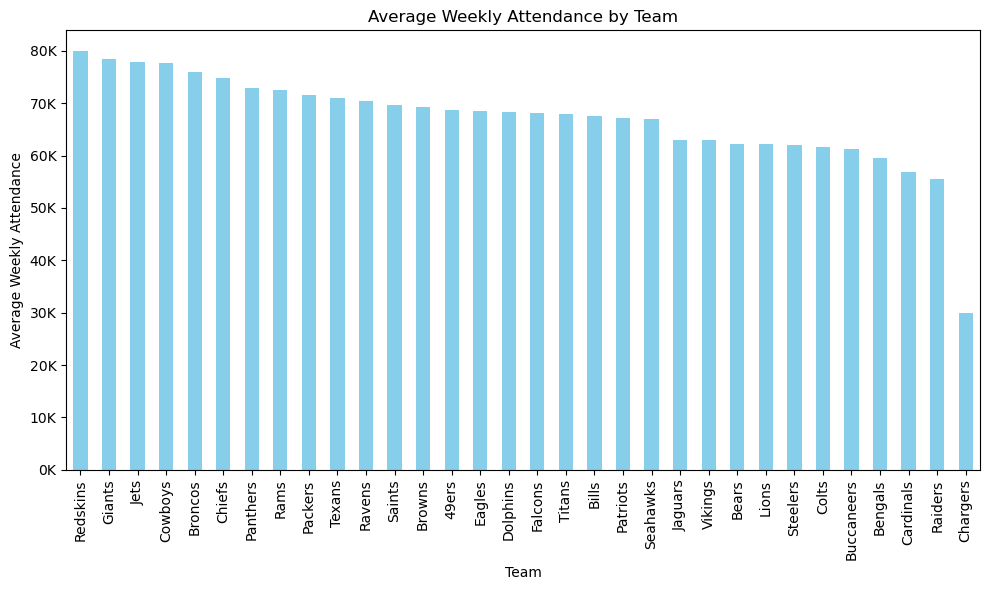

In [308]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## VEFSÍÐA



Below we are displaying the home win rate by each team. The win rate is defined as the total home wins by the team divided by the total home games that particular team played. This helps a new fan get a sense of their success rate.

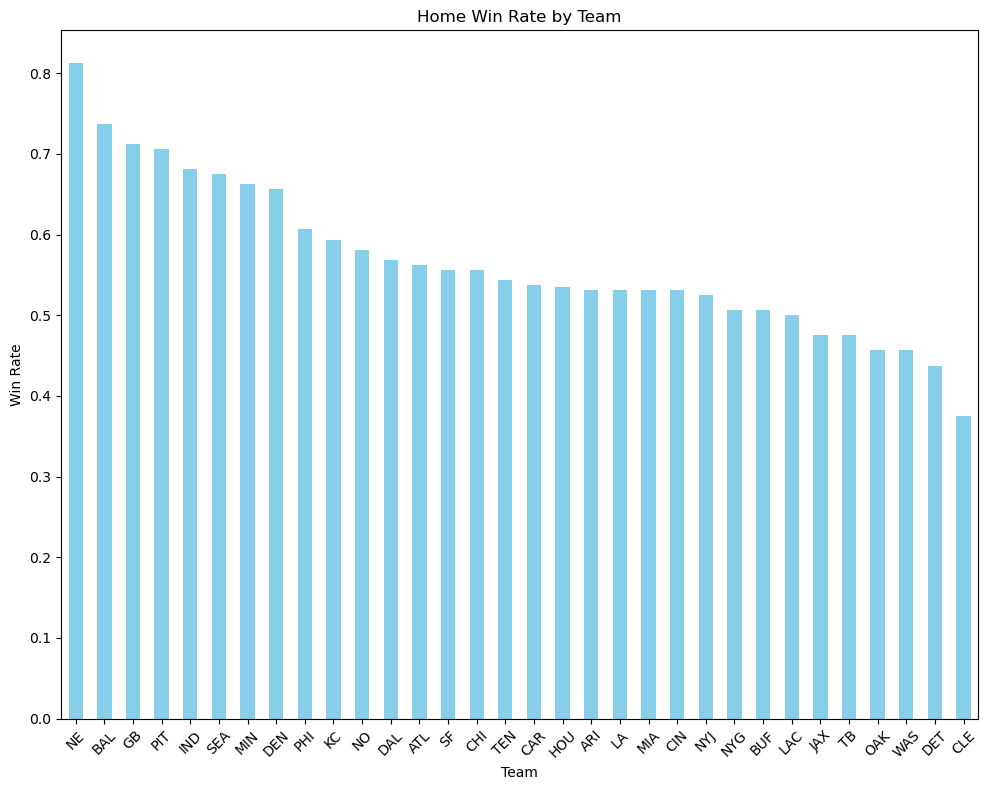

In [309]:
home_wins = result[result['home_team_win'] == 1].groupby('home_team').size()
total_home_games = result.groupby('home_team').size()
home_win_rate = (home_wins / total_home_games).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
home_win_rate.plot(kind='bar', color='skyblue')
plt.title('Home Win Rate by Team')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph below is an interactive graph made with plotly express to show each teams first win, if you hover over the data-points, you can see the team abbrivation and the date of their first win. This kind of graph can give important information about historical success.

In [310]:
home_first_win = result[result['home_score'] > result['away_score']].groupby('home_team')['gameday'].min()

away_first_win = result[result['away_score'] > result['home_score']].groupby('away_team')['gameday'].min()

first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min()
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min().reset_index()
first_wins.columns = ['Team', 'First Win']

fig = px.scatter(first_wins, x='First Win', y='Team', hover_data={'First Win': '|%Y-%m-%d'}, color='Team')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(title='First Win for Each Team', xaxis_title='Date of First Win', yaxis_title='Team')
fig.show()


The next graphs we do for the teams visualizations are bar charts, where each represents the yearly wins for the teams across various seasons, along with a trendline that shows the general direction of the change in wins over time for each team. These graphs give a valuable visual of how many games each team won each season and helps a fan analyse to assess the team performance. The trendline also gives a very good indication on in which direction the slope of the trendline is going.

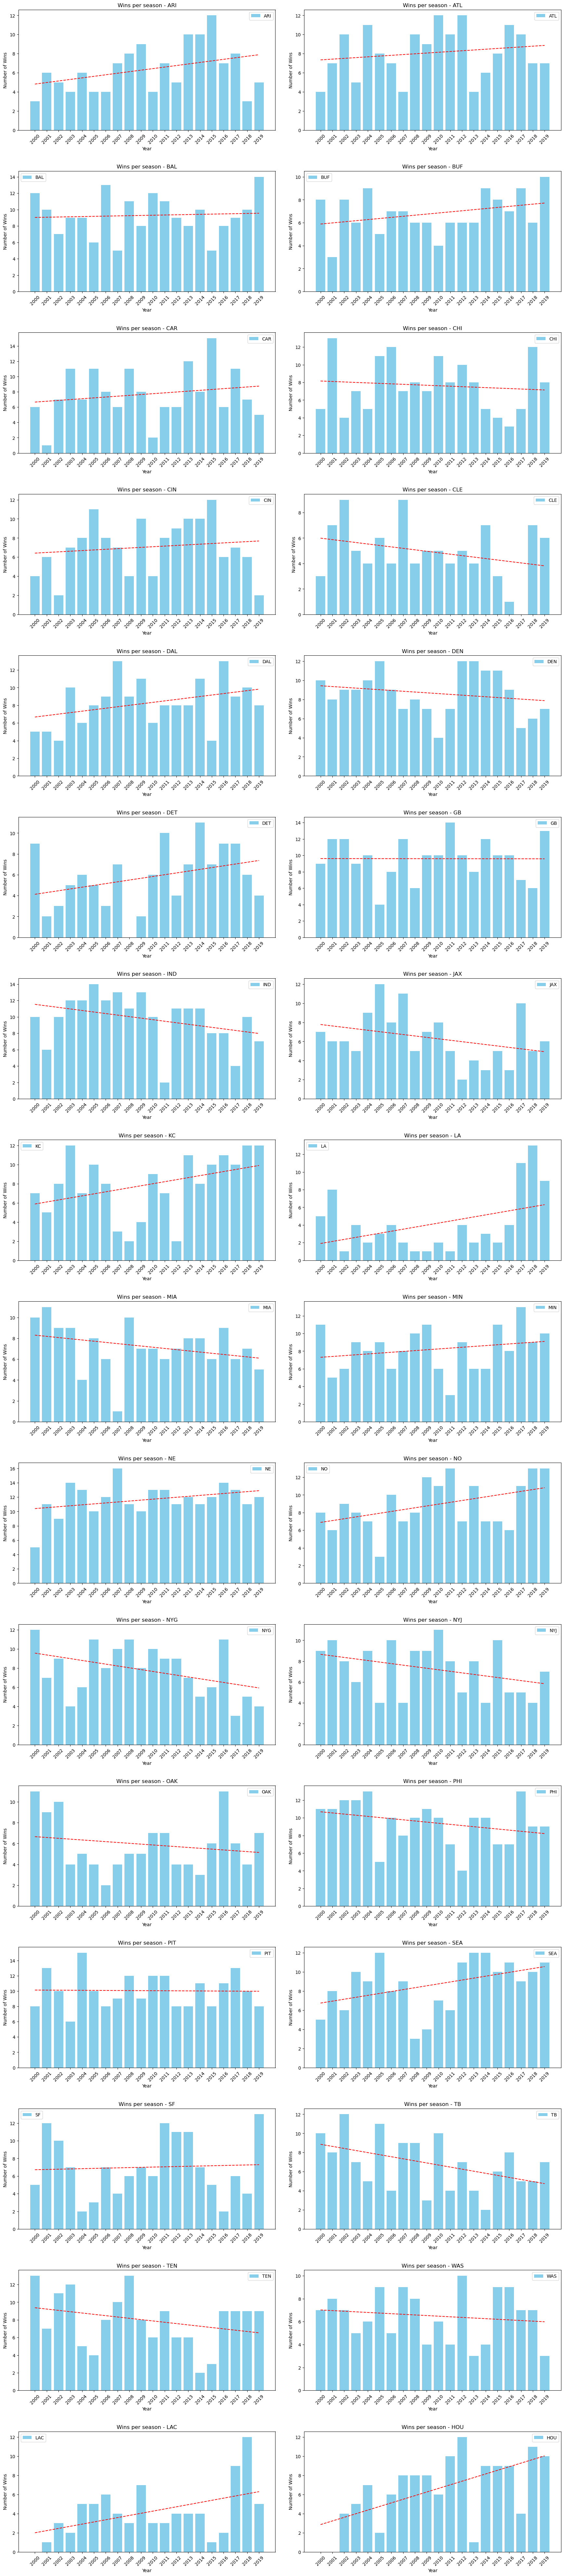

In [311]:
# grouping by season and team and count the number of wins
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# plot each team seperate
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  
num_rows = (num_teams + 1) // num_cols  

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # plotting the trendline with linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

   
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  
plt.show()

In [312]:
output_notebook()
reset_output()
source2 = ColumnDataSource(wins_pivot.reset_index())

num_teams = len(teams)
palette = [Category20[20][i % 20] for i in range(num_teams)]

pp = figure(title="Wins per Season by Team", x_axis_label='Season', y_axis_label='Number of Wins',
           tools="pan,wheel_zoom,box_zoom,reset,save", width=1300, height=1000)

bars = {}
for i, team in enumerate(teams):
    bars[team]=pp.vbar(x='season', top=team, width=0.4, source=source2, 
            legend_label=team, color=palette[i],
            muted_color=palette[i], muted_alpha=0.04,muted=True,alpha=0.8)

pp.legend.location = "top_left"
pp.legend.click_policy = "mute"  

pp.legend.location = "top_right"
pp.legend.orientation = "horizontal"
pp.legend.border_line_color = None
show(pp)

Loading BokehJS ...

The plot below shows the average wins per season for each team and also contains some key statistical measures. The teams that are above the median line are performing half the better than half of the teams, while those below are underperforming in relation to the median. Also, the teams closer to the upper quartile are showing stronger performance constistently.

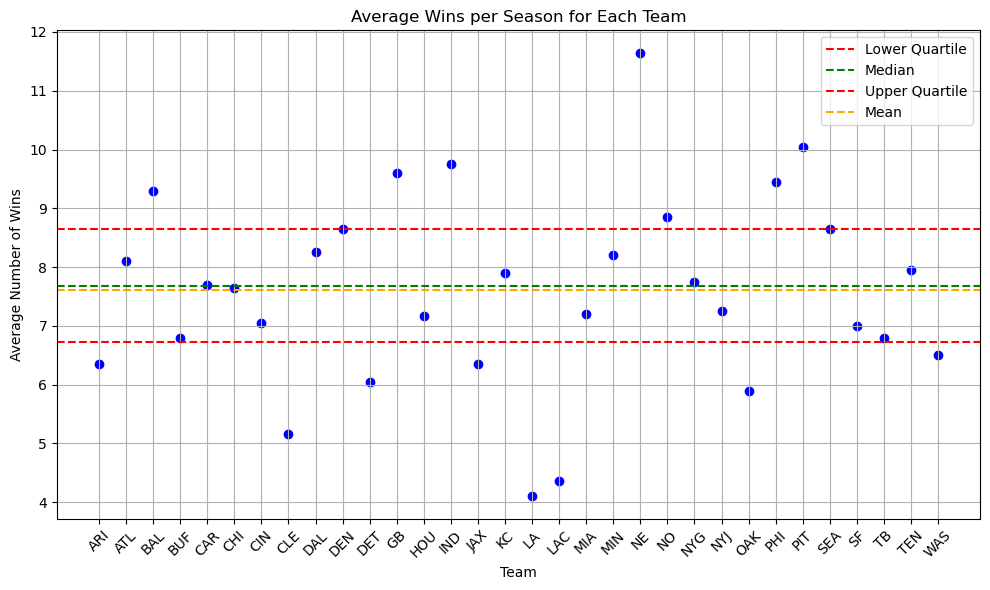

In [313]:
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# grouping by season and team and count the number of wins

wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# avg number of wins per season for each team
average_wins_per_team = wins_per_season.groupby('winning_team')['wins'].mean().reset_index()

# quartiles and median
lower_quartile = np.percentile(average_wins_per_team['wins'], 25)
median = np.percentile(average_wins_per_team['wins'], 50)
upper_quartile = np.percentile(average_wins_per_team['wins'], 75)
mean = average_wins_per_team['wins'].mean()


plt.figure(figsize=(10, 6))
plt.scatter(average_wins_per_team['winning_team'], average_wins_per_team['wins'], color='blue')
plt.title('Average Wins per Season for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)


plt.axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
plt.axhline(y=median, color='g', linestyle='--', label='Median')
plt.axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
plt.axhline(y=mean, color='orange', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

In [314]:
# Create the scatter plot

result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

fig = px.scatter(average_wins_per_team, x='winning_team', y='wins', 
                 title='Average Wins per Season for Each Team',
                 labels={'wins': 'Average Number of Wins', 'winning_team': 'Team'},
                 color_discrete_sequence=['blue'])  # set color

# Add lines for quartiles and mean
fig.add_hline(y=lower_quartile, line_dash="dash", line_color="red", annotation_text="Lower Quartile", annotation_position="bottom right")
fig.add_hline(y=median, line_dash="dash", line_color="green", annotation_text="Median", annotation_position="bottom right")
fig.add_hline(y=upper_quartile, line_dash="dash", line_color="red", annotation_text="Upper Quartile", annotation_position="bottom right")
fig.add_hline(y=mean, line_dash="dash", line_color="orange", annotation_text="Mean", annotation_position="bottom right")

# Improve layout
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Average Number of Wins",
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='array', tickvals=average_wins_per_team['winning_team'], ticktext=average_wins_per_team['winning_team']),
    title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}
)

fig.show()

#### Scores

Below we add a threshold for a high score and display high the number of high scoring games by a team compared to that threshold. 

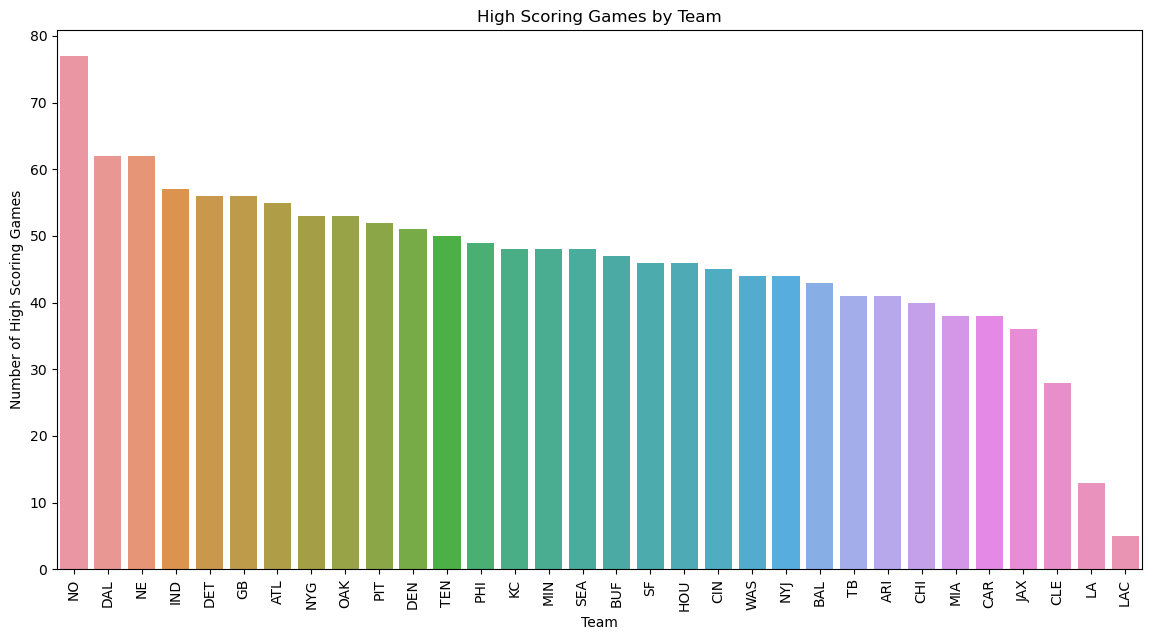

In [315]:
result['total_score'] = result['home_score'] + result['away_score']
total_games_home = result.groupby('home_team').size().reset_index(name='Total Home Games')



threshold = 50
high_scoring_games = result[result['total_score'] > threshold].groupby('home_team').size().reset_index(name='High Scoring Games')
high_scoring_games = high_scoring_games.sort_values(by= "High Scoring Games", ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='home_team', y='High Scoring Games', data=high_scoring_games)
plt.xticks(rotation=90)
plt.title('High Scoring Games by Team')
plt.xlabel('Team')
plt.ylabel('Number of High Scoring Games')
plt.show()

Below we normalize the by the total number of games played by each team to get a percentage of high-scoring games. This is fair as maybe not all teams have played the same number of games.

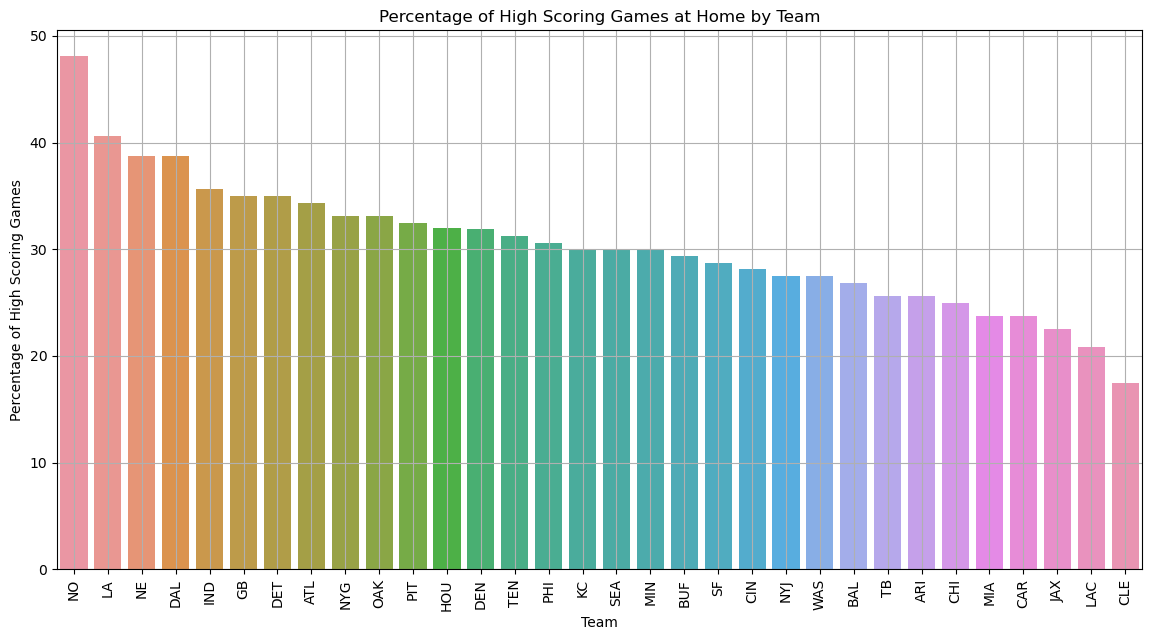

In [316]:
team_games = pd.merge(high_scoring_games, total_games_home, how='right', on='home_team')
team_games.fillna(0, inplace=True) 

team_games['Percentage High Scoring'] = (team_games['High Scoring Games'] / team_games['Total Home Games']) * 100
team_games = team_games.sort_values(by="Percentage High Scoring", ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='home_team', y='Percentage High Scoring', data=team_games)
plt.xticks(rotation=90)
plt.title('Percentage of High Scoring Games at Home by Team')
plt.xlabel('Team')
plt.ylabel('Percentage of High Scoring Games')
plt.grid(True)
plt.show()

------------------------

<a id="discuss"></a> <br>
# Discussion

-----------------------

<a id="contribute"></a> <br>
# Contributions